# Laboratorio #8. Diseño de Filtros.

**Estudiante: Luna Katalina Quintero Jiménez.**

**I. Introducción.**

En el procesamiento de señales, los filtros juegan un papel fundamental en la manipulación y análisis de datos. Los filtros IIR (Infinite Impulse Response) son una categoría importante de filtros que se caracterizan por su capacidad para mantener información de señales pasadas a través de realimentación. Dentro de esta categoría, los filtros Butterworth, Chebyshev y Elíptico son ampliamente utilizados debido a sus diferentes características y aplicaciones.

En este informe, se llevará a cabo un análisis comparativo de estos tres tipos de filtros aplicados a una señal de electrocardiograma (ECG). Se examinarán sus respuestas en frecuencia, su capacidad para preservar la forma de onda original de la señal y su eficacia en términos de atenuación de frecuencias no deseadas. El objetivo es proporcionar una comprensión más profunda de las ventajas y limitaciones de cada filtro en el contexto específico del procesamiento de señales biomédicas.


**II. Marco teórico.**

**Filtros IIR (Infinite Impulse Response).**

Los filtros IIR son sistemas lineales e invariantes en el tiempo que se caracterizan por tener una respuesta infinita al impulso debido a la realimentación de la señal de salida. Esto significa que la salida del filtro IIR depende no sólo de las muestras de entrada actuales y pasadas, sino también de las salidas previas del propio filtro.
La ecuación en diferencias que describe un filtro IIR es:

$$y(n)=b_{0}x(n)+b_{1}x(n-1)+...+b_{M}x(n-M)-a_{1}y(n-1)-a_{2}y(n-2)-...-a_{N}y(n-N)=\sum_{k=0}^{M}b_{k}\cdot x(n-k)-\sum_{k=1}^{N}a_{k}\cdot y(n-k)$$


Donde $y(n)$ es la salida en el instante n, $x(n)$ la entrada, ai son los coeficientes del numerador y bi los coeficientes del denominador. La función de transferencia correspondiente es:

$$H(z)=(a_{0}+a_{1}z^{-1}+...+a_{N}z^{-N})/(1+b_{1}z^{-1}+...+b_{M}z^{-M})$$

Las principales ventajas de los filtros IIR frente a los FIR son su mayor eficiencia para obtener ciertas características con un orden dado (al poder ubicar tanto ceros como polos), y su menor consumo de memoria e instrucciones. Sin embargo, los filtros IIR pueden ser inestables si no se diseñan adecuadamente, producen distorsión de fase y requieren considerar desbordamientos. [1]

**Filtro Butterworth.**

Un tipo de filtro IIR es el filtro Butterworth. Este es conocido por su respuesta en frecuencia máximamente plana en la banda de paso, lo que significa que no presenta oscilaciones ni ripple en esta región. Este tipo de filtro ofrece un comportamiento generalmente bueno y una mejor respuesta a la entrada de pulsos en comparación con otros filtros. Sin embargo, su principal desventaja radica en que su caída de la respuesta en frecuencia es relativamente lenta, lo que requiere un mayor orden para cumplir con especificaciones de banda rechazada particulares. En resumen, el filtro Butterworth destaca por su planicidad en la banda de paso y su respuesta lineal en fase, aunque puede necesitar un mayor orden para lograr ciertas especificaciones de atenuación.

**Filtro Chebyshev.**

El filtro Chebyshev también es un filtro IIR, se caracteriza por ofrecer una mejor atenuación a frecuencias más altas que el Butterworth en la banda de paso. Sin embargo, en la banda de paso presenta un rizado que puede ser significativo. Los filtros Chebyshev se dividen en dos tipos: Tipo I, que tiene ripple en la banda de paso y solo utiliza polos, y Tipo II, que tiene ripple en la banda de atenuación y utiliza tanto polos como ceros. El diseño de estos filtros implica un compromiso entre la pendiente de atenuación en decibelios por década y el nivel de ripple permitido.

El "ripple" o "rizado" en el contexto de los filtros se refiere a las variaciones periódicas o fluctuaciones en la respuesta en frecuencia del filtro.O sea, es la presencia de oscilaciones o picos y valles en la amplitud de la respuesta del filtro en ciertas frecuencias dentro de la banda de interés. Estas variaciones pueden ser indeseables en algunos casos, ya que pueden afectar la precisión y la estabilidad de la señal filtrada.


En los filtros Chebyshev, por ejemplo, se permite un cierto nivel de ripple en la banda de paso para lograr una mejor atenuación en frecuencias altas. Por otro lado, los filtros Butterworth se caracterizan por tener una respuesta en frecuencia más plana en la banda de paso, sin presentar ripple. [2]

**Filtro elíptico.**

El filtro elíptico, a diferencia de otros tipos de filtros, exhibe un rizado tanto en la banda de paso como en la de atenuación, aproximándose más al ideal por su rápida caída en la banda de transición. Esta característica, mencionada como una ventaja, implica un cambio abrupto desde la banda de paso hacia la de supresión. Sin embargo, su complejidad radica en el cálculo de funciones elípticas, lo que dificulta la resolución de su función de transferencia.

Su capacidad para lograr cortes de frecuencia muy nítidos lo posiciona como una elección óptima en el diseño de filtros, especialmente cuando se requiere atenuación inmediata en frecuencias cercanas al límite de la banda de paso. Además, su efecto de dominó se extiende a ambas bandas, lo cual lo convierte en una excelente opción para filtros de paso bajo, minimizando el error a ambos lados de la frecuencia de corte. En contraste, el filtro Chebyshev, con su rolloff más lento y una ondulación desequilibrada, carece de estas ventajas. Por lo tanto, cuando se trata de señales próximas y la necesidad de un corte preciso, especialmente en la modulación de audio, se recomienda el uso de este tipo de filtro. [3]

**La señal ECG.**

La señal ECG, o Electrocardiograma, es un registro de la actividad eléctrica del corazón a lo largo del tiempo. Esta actividad eléctrica es fundamental para coordinar los latidos del corazón y asegurar un bombeo eficiente de la sangre a través del cuerpo. El ECG se obtiene colocando electrodos en la piel que captan las corrientes eléctricas generadas por el corazón y las representan gráficamente en forma de ondas.

La ECG es muy importante en la biomedicina ya que proporciona información crucial sobre la función cardíaca. Al analizar un ECG, los profesionales de la salud pueden:

1. Diagnosticar trastornos del ritmo cardíaco: El ECG puede detectar arritmias cardíacas, como la fibrilación auricular o taquicardias, que pueden ser potencialmente peligrosas para la salud.

2. Evaluar la función cardíaca: El ECG puede proporcionar información sobre la fuerza y regularidad de los latidos del corazón, así como detectar signos de daño cardíaco.

3. Detectar signos de isquemia: Cambios en el ECG pueden indicar falta de oxígeno en el corazón, lo que sugiere la presencia de enfermedad coronaria.

4. Monitorizar a pacientes: El ECG se utiliza para monitorizar la actividad eléctrica del corazón durante procedimientos médicos, cirugías o en unidades de cuidados intensivos. [4]


**III. Procedimiento.**

**Parte 1. Filtrado de la interferencia de $60Hz$.**

En esta parte se importó la señal ECG del paciente de 28 años y se realizó su gráfica con respecto al tiempo.

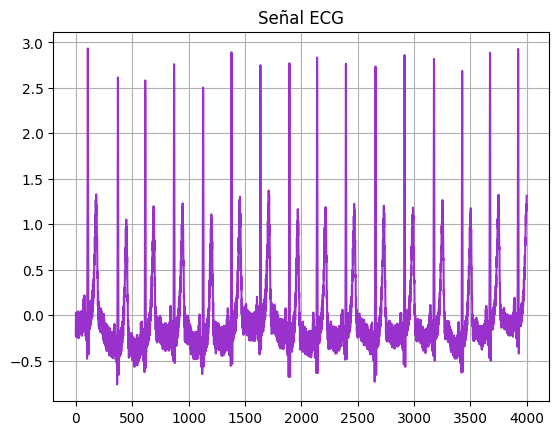

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
import pandas as pd
import sympy as sym
import scipy
from sympy.abc import k
df = pd.read_csv('ecg.csv',header=None)
ecg = df.values.flatten()
plt.grid()
plt.title("Señal ECG")
plt.plot (ecg,"darkorchid")

A continuación, se obtuvo la Transformada de Fourier de la señal y la gráfica de su magnitud.

Text(0.5, 1.0, 'Magnitud FFT de ECG')

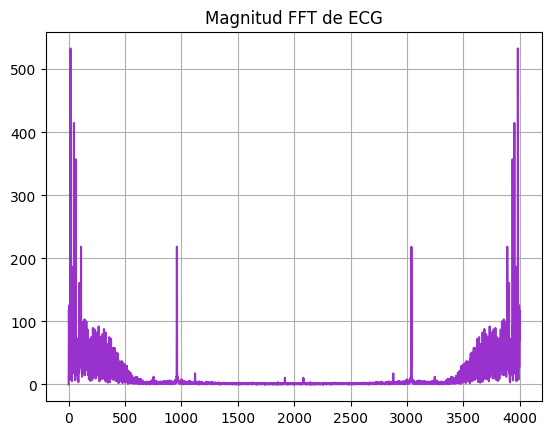

In [ ]:
#Traeremos a Fourier para hacer un análisis en frecuencia.
#TF de ecg y gráfica de su magnitud.
a = np.fft.fft(ecg)
magnitud = np.abs(a)
fase = np.angle(a)
plt.plot(magnitud,"darkorchid")
plt.grid()
plt.title("Magnitud FFT de ECG")

Existe un pico en la gráfica anterior que corresponde a la interferencia de la red eléctrica. A continuación se calculó el valor en $Hz$ que corresponde a este pico.

In [ ]:
fs = 250 #frecuencia de muestreo
w = np.max(magnitud[900:1000])
f = (w*fs)/(2*np.pi)
f

8693.700047720571

A continuación se diseñará un filtro rechazabanda Butterworth digital que cumpla con las siguientes
especificaciones:

• $f_{p1} = 50 Hz$

• $f_{s1} = 58 Hz$

• $f_{s2} = 62 Hz$

• $f_{p2} = 70 Hz$

• $gpass1 = gpass2 = 3dB$

• $gstop = 80dB$

In [ ]:
fs = 250 #Hz
fp1 = 50 #Hz
fp2 = 70 #Hz
fs1 = 58 #Hz
fs2 = 62 #Hz
gpass1 = 3 #db
gpass2 = 3 #db
gstop = 80 #db
wp1 = (2*np.pi*fp1)/fs #frecuencia fp1 en tiempo discreto
wp2 = (2*np.pi*fp2)/fs #frecuencia fp2 en tiempo discreto
ws1 = (2*np.pi*fs1)/fs #frecuencia fs1 en tiempo discreto
ws2 = (2*np.pi*fs2)/fs #frecuencia fs2 en tiempo discreto
print(wp1)
print(wp2)
print(ws1)
print(ws2)

1.2566370614359172
1.7592918860102842
1.4576989912656642
1.5582299561805373


**Filtro Butterworth para la señal ECG.**

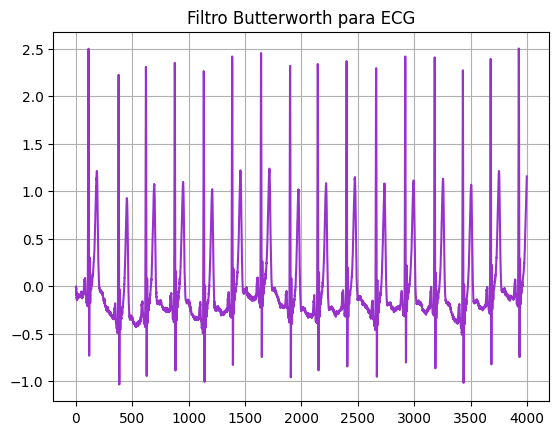

In [ ]:
#Filtro #1: Butterworth.
N, wn = signal.buttord([wp1,wp2],[ws1,ws2], gpass1, gstop)
b, a = signal.butter(N, wn, 'bandstop')
y = signal.lfilter(b, a, ecg)
plt.title("Filtro Butterworth para ECG")
plt.grid()
plt.plot(y, "darkorchid")

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


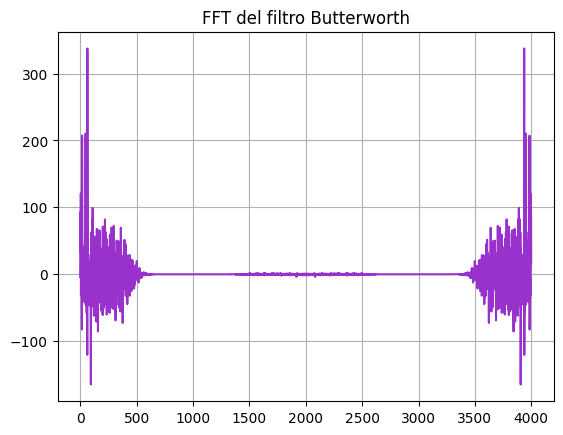

In [ ]:
y1 = np.fft.fft(y)
plt.title("FFT del filtro Butterworth")
plt.grid()
plt.plot(y1,"darkorchid")

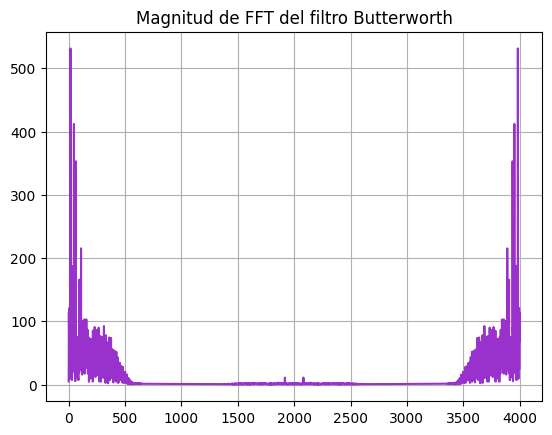

In [ ]:
plt.title("Magnitud de FFT del filtro Butterworth")
plt.grid()
plt.plot(np.abs(y1),"darkorchid")

In [ ]:
ws = (2*np.pi*fs)/fs #fs en tiempo discreto es
rp = gpass1
rs = gstop
ws #2pi

6.283185307179586

En comparación con la gráfica de Magnitud FFT de ECG es posible ver que en la gráfica de la Magnitud de FFT del filtro Butterworth el pico de interferencia que estaba entre 900 y 1000 ha desaparecido después de aplicado este filtro.

**Filtro Chebyshev para la señal ECG.**

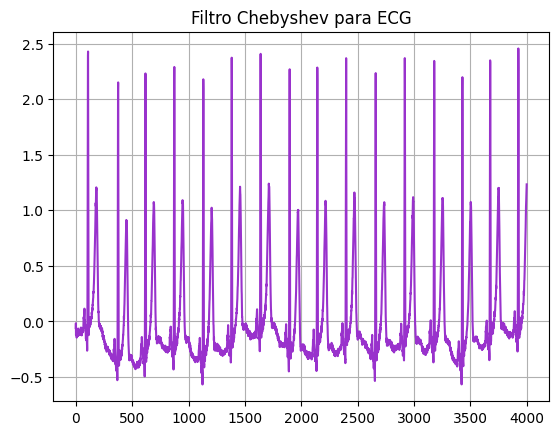

In [ ]:
#Filtro #2: Chebyshev.
N1, wn1 = signal.cheb1ord([wp1,wp2],[ws1,ws2], gpass1, gstop, fs=ws)
d, c = signal.cheby1(N1, gpass1, wn1, 'bandstop', fs=ws)
z = signal.lfilter(d, c, ecg)
plt.title("Filtro Chebyshev para ECG")
plt.grid()
plt.plot(z,"darkorchid")

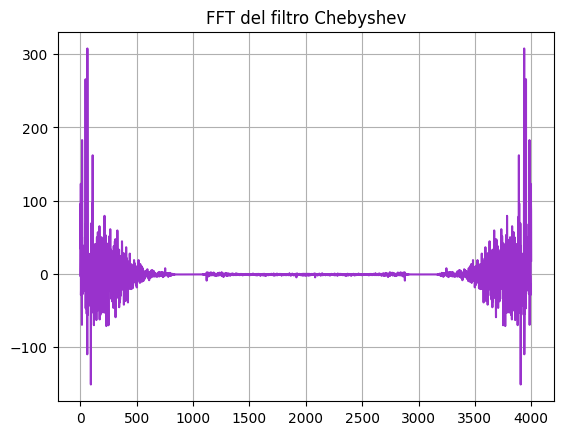

In [ ]:
z1 = np.fft.fft(z)
plt.title("FFT del filtro Chebyshev")
plt.grid()
plt.plot(z1,"darkorchid")

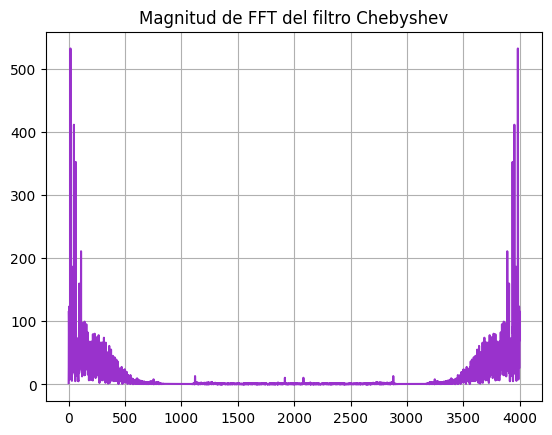

In [ ]:
plt.title("Magnitud de FFT del filtro Chebyshev")
plt.grid()
plt.plot(np.abs(z1),"darkorchid")

Nuevamente, comparado esta gráfica con la de Magnitud FFT de ECG es posible ver que en la gráfica de la Magnitud de FFT del filtro Chebyshev el pico de interferencia que estaba entre 900 y 1000 ha desaparecido después de aplicado este filtro.

**Filtro Elíptico para la señal ECG.**

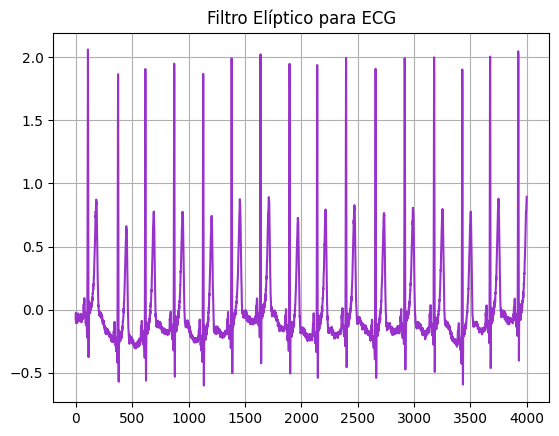

In [ ]:
#Filtro #3: Elíptico.
N2, wn2 = signal.ellipord([wp1,wp2],[ws1,ws2], gpass1, gstop, fs=ws)
f, e = signal.ellip(N2, gpass1, gstop, wn2, 'bandstop', fs=ws)
w = signal.lfilter(f, e, ecg)
plt.title("Filtro Elíptico para ECG")
plt.grid()
plt.plot(w,"darkorchid")

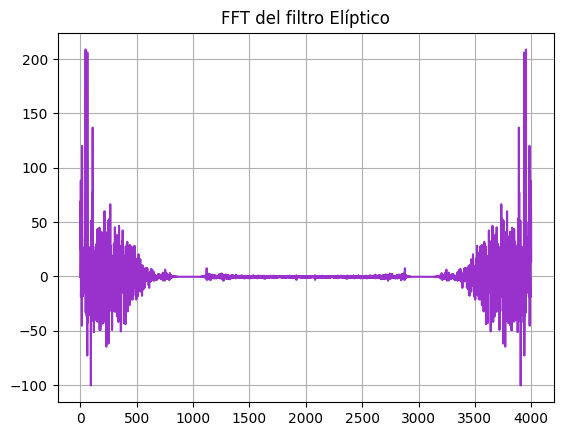

In [ ]:
w1 = np.fft.fft(w)
plt.title("FFT del filtro Elíptico")
plt.grid()
plt.plot(w1,"darkorchid")

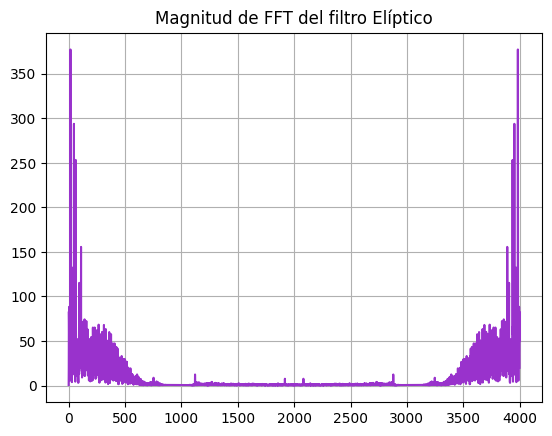

In [ ]:
plt.title("Magnitud de FFT del filtro Elíptico")
plt.grid()
plt.plot(np.abs(w1),"darkorchid")

Una vez más, comparado esta gráfica con la de Magnitud FFT de ECG es posible ver que en la gráfica de la Magnitud de FFT del filtro Elíptico el pico de interferencia que estaba entre 900 y 1000 ha desaparecido después de aplicado este filtro.

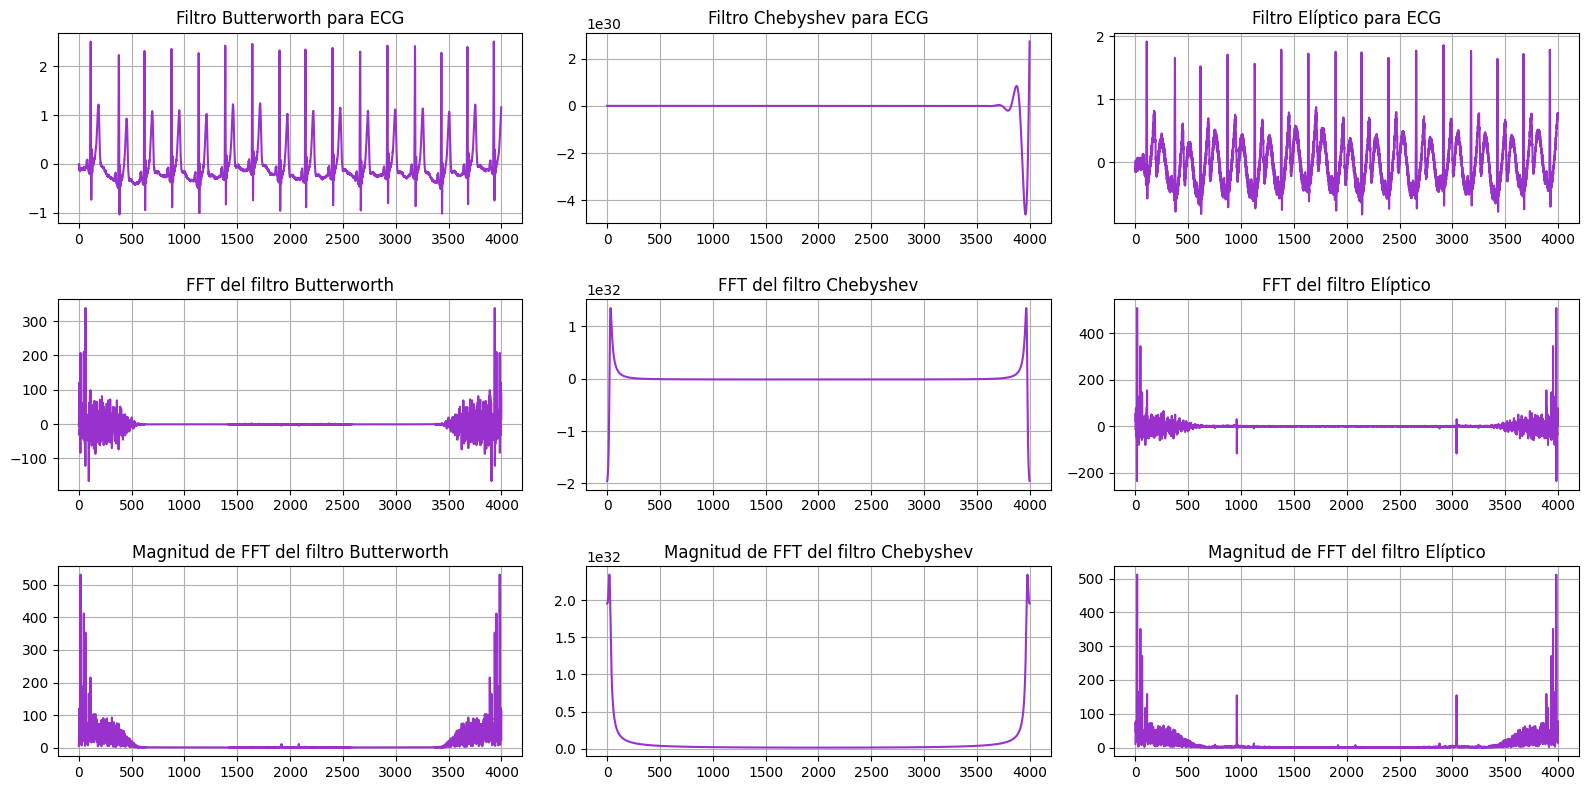

In [ ]:
#Visualizando todas las gráficas en una sola imagen
plt.figure(figsize=(16, 8))
# Filtro Butterworth
N, wn = signal.buttord([wp1, wp2], [ws1, ws2], gpass1, gstop)
b, a = signal.butter(N, wn, 'bandstop')
y = signal.lfilter(b, a, ecg)
plt.subplot(331)
plt.title("Filtro Butterworth para ECG")
plt.grid()
plt.plot(y, "darkorchid")

y1 = np.fft.fft(y)
plt.subplot(334)
plt.title("FFT del filtro Butterworth")
plt.grid()
plt.plot(y1, "darkorchid")

plt.subplot(337)
plt.title("Magnitud de FFT del filtro Butterworth")
plt.grid()
plt.plot(np.abs(y1), "darkorchid")

# Filtro Chebyshev
N1, wn1 = signal.cheb1ord([wp1, wp2], [ws1, ws2], gpass1, gstop, fs=fs)
d, c = signal.cheby1(N1, gpass1, wn1, 'bandstop', fs=fs)
z = signal.lfilter(d, c, ecg)
plt.subplot(332)
plt.title("Filtro Chebyshev para ECG")
plt.grid()
plt.plot(z, "darkorchid")

z1 = np.fft.fft(z)
plt.subplot(335)
plt.title("FFT del filtro Chebyshev")
plt.grid()
plt.plot(z1, "darkorchid")

plt.subplot(338)
plt.title("Magnitud de FFT del filtro Chebyshev")
plt.grid()
plt.plot(np.abs(z1), "darkorchid")

# Filtro Elíptico
N2, wn2 = signal.ellipord([wp1, wp2], [ws1, ws2], gpass1, gstop, fs=fs)
f, e = signal.ellip(N2, gpass1, gstop, wn2, 'bandstop', fs=fs)
w = signal.lfilter(f, e, ecg)
plt.subplot(333)
plt.title("Filtro Elíptico para ECG")
plt.grid()
plt.plot(w, "darkorchid")

w1 = np.fft.fft(w)
plt.subplot(336)
plt.title("FFT del filtro Elíptico")
plt.grid()
plt.plot(w1, "darkorchid")

plt.subplot(339)
plt.title("Magnitud de FFT del filtro Elíptico")
plt.grid()
plt.plot(np.abs(w1), "darkorchid")

plt.tight_layout()
plt.show()

Analizando esta matriz de imágenes resulta notorio que el filtro que mejor eliminó el pico de interferencia fue el filtro Butterworth en comparación con el Chebyshev y el elíptico.

Ahora se presentan las gráficas en una misma figura una parte de la señal que corresponda a 2 ciclos cardíacos de la señal original, la salida del filtro Butterworth, y la salida del filtro Chebyshev y la salida del filtro elíptico.

(<Axes: title={'center': 'Filtro Elíptico'}>,
 Text(0.5, 1.0, 'Filtro Elíptico'))

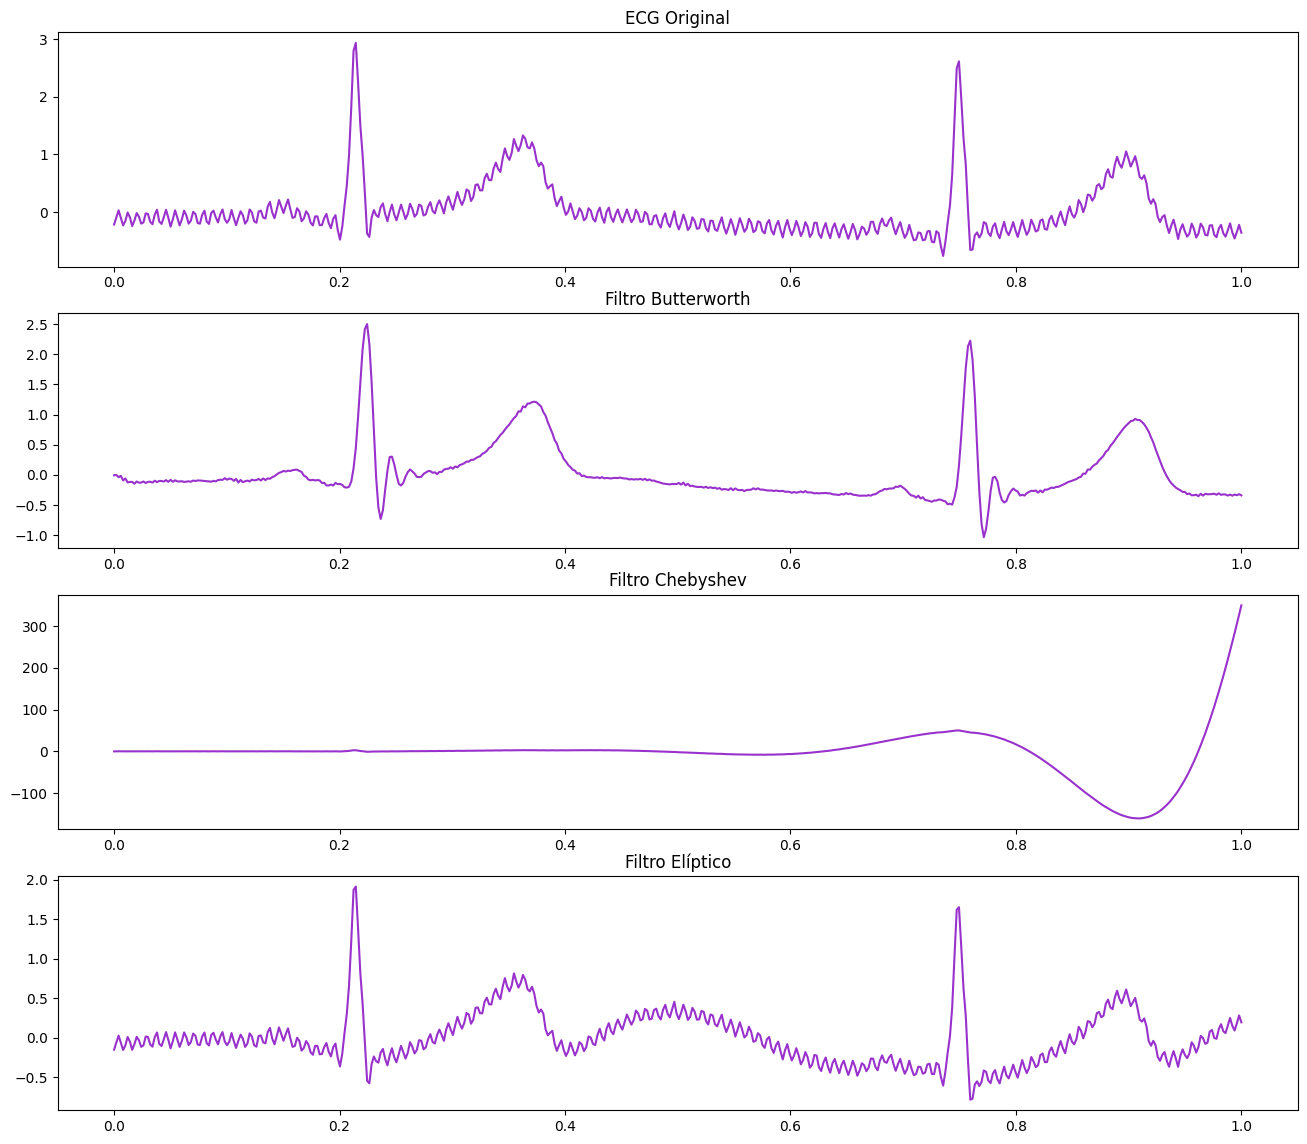

In [ ]:
t = np.linspace(0, 1, 500)
plt.figure(figsize=(16,14))
plt.subplot(4,1,1), plt.plot(t[:500],ecg[:500],"darkorchid"), plt.title("ECG Original")
plt.subplot(4,1,2), plt.plot(t[:500],y[:500],"darkorchid"), plt.title("Filtro Butterworth")
plt.subplot(4,1,3), plt.plot(t[:500],z[:500],"darkorchid"), plt.title("Filtro Chebyshev")
plt.subplot(4,1,4), plt.plot(t[:500],w[:500],"darkorchid"), plt.title("Filtro Elíptico")

Entre todas estas ondas resultantes el filtro Elíptico fue el que perdió menos muestras de la señal original.

**IV. Análisis de resultados.**



Para determinar el orden de cada señal veamos el orden de N, N1 y N2 para los filtros Butterworth, Chebyshev y Elíptico, respectivamente.

In [ ]:
print("El grado del filtro Butterworth es:", N)
print("El grado del filtro Chebyshev es:", N1)
print("El grado del filtro Elíptico es:", N2)

El grado del filtro Butterworth es: 6
El grado del filtro Chebyshev es: 5
El grado del filtro Elíptico es: 4


Por lo que es posible apreciar que el filtro con menor orden es el **Filtro Elíptico**, seguido del filtro Chebyshev y de último el filtro Butterworth.

El filtro que tuvo una mejor calidad en la forma de onda de la señal de salida se puede ver que es el **Filtro Elíptico**. Esto es evidente analizando la última imagen, en esta se presentaron las gráficas en una misma figura de una parte de la señal que corresponda a 2 ciclos cardíacos, y se encuentra la señal original y la misma pero con cada filtro aplicado. En el caso de los filtros Butterworth y Chebyshev es posible apreciar cómo varios datos de la señal original se pierden; mientras que, para el Filtro Elíptico, la onda es la más parecida a la de la señal original.

La diferencia en los resultados obtenidos se debe principalmente a las diferencias entre los filtros utilizados y el orden de ellos mismos.

El filtro Butterworth causó cierta distorsión en las frecuencias de corte y una transición un poco abrupta entre las bandas, lo que puede resultó en una pérdida de información en la señal original.

Por su lado, el filtro Chebyshev fue muy diferente a los otros dos, sus ondulaciones causaron distorsión en la señal y en consecuencia, se perdieron muchos datos de la señal original.

El filtro Elíptico optimiza la transición entre las bandas de paso. Lo que minimiza la distorsión de la señal y preserva mejor su forma de onda original.

Además, en relación a los órdenes de los filtros, es importante considerar que un filtro de menor orden puede tener una transición más suave entre las bandas de paso y de atenuación. Por el contrario, un filtro de mayor orden puede tener una mejor capacidad para eliminar frecuencias no deseadas, pero puede introducir más distorsión en la señal.

**V. Conclusiones.**

En este estudio comparativo de filtros IIR aplicados a señales de electrocardiograma (ECG), se han observado diferencias significativas en cuanto a su capacidad para preservar la forma de onda original de la señal y atenuar frecuencias no deseadas. Se ha demostrado que el filtro Elíptico ofrece una respuesta en frecuencia más nítida y una mejor capacidad de atenuación en comparación con los filtros Butterworth y Chebyshev. Aunque el filtro Butterworth destaca por su respuesta en frecuencia plana en la banda de paso, su caída gradual en la banda de atenuación puede requerir un mayor orden para cumplir con ciertas especificaciones de atenuación. Por otro lado, el filtro Chebyshev ofrece una mejor atenuación en frecuencias altas, pero puede presentar un rizado significativo en la banda de paso. En resumen, la elección del filtro adecuado depende de las necesidades específicas de la aplicación y de la importancia relativa de la selectividad, la precisión y la estabilidad de la señal filtrada. Este análisis proporciona una base sólida para futuras investigaciones y aplicaciones en el campo del procesamiento de señales biomédicas.

**VI. Referencias.**

[1] FUNDAMENTOS TEÓRICOS: FILTROS. Biblus.us.es. Recuperado el 16 de mayo de 2024, de https://biblus.us.es/bibing/proyectos/abreproy/11375/fichero/MEMORIA%252FFundamentos+teoricos.pdf

[2] (S/f-c). Edu.ar. Recuperado el 16 de mayo de 2024, de https://www.fceia.unr.edu.ar/dce2/Files/Apuntes/FILTROS%20ACTIVOS%20-%20Notas%20de%20Clase%20(v-2019-1).pdf

[3] Siguenza, J. (2011, febrero 28). Filtro elíptico. Monografias.com. https://www.monografias.com/trabajos83/filtro-eliptico/filtro-eliptico

[4] (S/f-d). Oocities.org. Recuperado el 16 de mayo de 2024, de https://www.oocities.org/vifibio/01ECG.PDF